In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import cv2
import math
import os

In [2]:
def add_padding(image):
    original_height, original_width = image.shape
    target_ratio = math.sqrt(2)
    new_width = int(original_width * target_ratio)
    new_height = int(original_height * target_ratio)
    left_padding = (new_width - original_width) // 2
    top_padding = (new_height - original_height) // 2
    padded_image = np.ones((new_height, new_width), dtype=np.uint8) * 255
    padded_image[top_padding:top_padding + original_height, left_padding:left_padding + original_width] = image
    return padded_image

In [3]:
def convert_to_gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
def rotate_image(image, rotation_angle):
    center = (image.shape[1] // 2, image.shape[0] // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
    return cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]), borderValue=(255, 255, 255))

In [5]:
def find_rotation_angle(image, line_image):
    angle = 0
    max = 0
    for rotation_angle in range(0, 360):
        image_new = image.copy()
        image_new = rotate_image(image_new, rotation_angle)
        img_1d = image_new.ravel()
        line_image_1d = line_image.ravel()
        both_zero = (img_1d == 0) & (line_image_1d == 0)
        distance = np.sum(both_zero)
        if distance > max:
            max = distance
            angle = rotation_angle
    return angle

In [6]:
def show_images(images_rgb):
    fig, axes = plt.subplots(11, 9, figsize=(10, 10))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images_rgb[i], cmap="gray")
        ax.set_title(f"Image {i+1}")
        ax.axis('off')
    plt.show()

In [7]:
def get_line_image(image):
    width = image.shape[1]
    height = image.shape[0]
    line_color = (0, 0, 0)
    line_image = np.ones((height, width, 3), dtype=np.uint8) * 255
    center_x = width // 2
    line_thickness = 1
    cv2.line(line_image, (center_x, 0), (center_x, height), line_color, line_thickness)
    return convert_to_gray_scale(line_image)

In [8]:
def find_bounding_box(image):
    thresh = cv2.bitwise_not(image)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    return image[y:y + h, x:x + w]

In [9]:
input_image = cv2.imread('./KIMIA dataset/bonefishes.png')

In [10]:
input_image_gray_scale = convert_to_gray_scale(input_image)

In [11]:
input_image_bb = find_bounding_box(input_image_gray_scale)

In [12]:
input_image_padded = add_padding(input_image_bb)

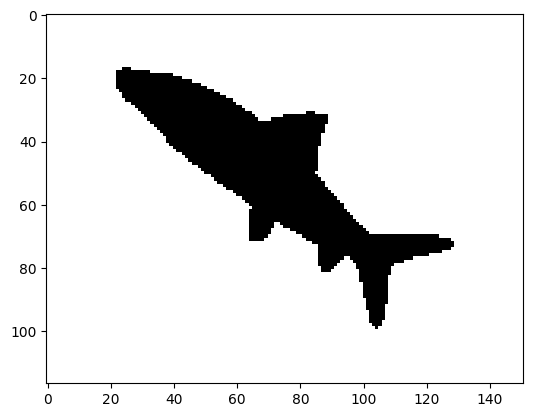

In [13]:
plt.imshow(input_image_padded, cmap='gray')

In [14]:
line_image = get_line_image(input_image_padded)

In [15]:
input_angle = find_rotation_angle(input_image_padded, line_image)

In [16]:
print(input_angle)

129


In [17]:
folder_path = "./KIMIA dataset/"
file_list = os.listdir(folder_path)
image_extensions = (".png")
image_files = [file for file in file_list if file.lower().endswith(image_extensions)]

In [18]:
print(image_files)

['bonefishes.png', 'bonefishesocc1.png', 'bunny04.png', 'calf1.png', 'calf2.png', 'cat1.png', 'cat2.png', 'cow1.png', 'cow2.png', 'desertcottontail.png', 'dog1.png', 'dog2.png', 'dog3.png', 'dogfishsharks.png', 'donkey1.png', 'dude0.png', 'dude1.png', 'dude10.png', 'dude11.png', 'dude12.png', 'dude2.png', 'dude4.png', 'dude5.png', 'dude6.png', 'dude7.png', 'dude8.png', 'easterncottontail.png', 'f15.png', 'f16.png', 'f16occ1.png', 'fgen1ap.png', 'fgen1bp.png', 'fgen1ep.png', 'fgen1fp.png', 'fgen2dp.png', 'fgen2fp.png', 'fgen3bp.png', 'fgen5cp.png', 'fish14.png', 'fish23.png', 'fish28.png', 'fish30.png', 'fox1.png', 'hand.png', 'hand2.png', 'hand2occ1.png', 'hand2occ2.png', 'hand2occ3.png', 'hand3.png', 'hand90.png', 'handbent1.png', 'handbent2.png', 'handdeform.png', 'handdeform2.png', 'harrier.png', 'harrierocc1.png', 'harrierocc2.png', 'harrierocc3.png', 'herrings.png', 'kk0728.png', 'kk0729.png', 'kk0731.png', 'kk0732.png', 'kk0735.png', 'kk0736.png', 'kk0737.png', 'kk0738.png', 'kk0

In [19]:
dataset = []

In [20]:
for i in range(0, len(image_files)):
    image_path = os.path.join(folder_path, image_files[i])
    dataset.append(cv2.imread(image_path))

In [21]:
output_dataset = dataset.copy()

In [22]:
for i in range(0, len(dataset)):
    dataset[i] = convert_to_gray_scale(dataset[i])
    dataset[i] = find_bounding_box(dataset[i])
    dataset[i] = add_padding(dataset[i])

In [23]:
angles = []

In [24]:
for i in range(0, len(dataset)):
    line_image = get_line_image(dataset[i])
    angles.append(find_rotation_angle(dataset[i], line_image))

In [25]:
print(angles)

[129, 129, 103, 114, 113, 110, 107, 113, 113, 128, 120, 60, 55, 130, 133, 31, 154, 33, 29, 28, 166, 169, 149, 28, 35, 45, 130, 40, 121, 117, 0, 0, 0, 0, 0, 2, 0, 0, 135, 139, 140, 137, 96, 12, 152, 29, 134, 172, 59, 102, 0, 168, 12, 70, 45, 44, 45, 45, 309, 88, 96, 88, 83, 89, 88, 87, 89, 93, 88, 90, 89, 12, 0, 0, 132, 83, 78, 157, 133, 54, 55, 103, 73, 66, 133, 133, 309, 295, 67, 66, 240, 139, 49, 136, 142, 0, 270, 96, 133]


In [26]:
final = []

In [27]:
for i in range(0, len(output_dataset)):
    final.append(rotate_image(output_dataset[i], angles[i] - input_angle))

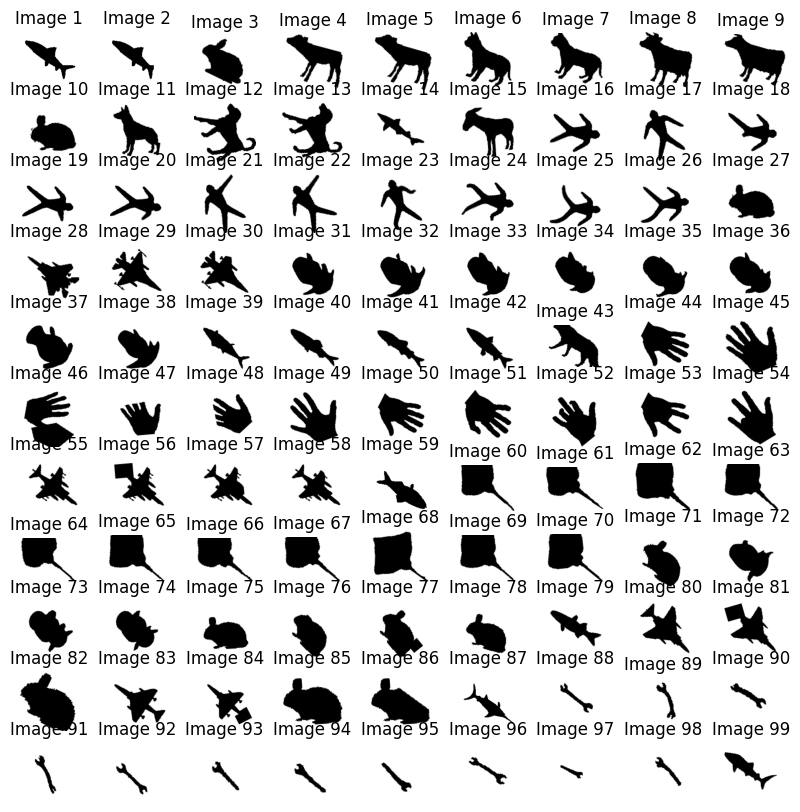

In [28]:
show_images(final)

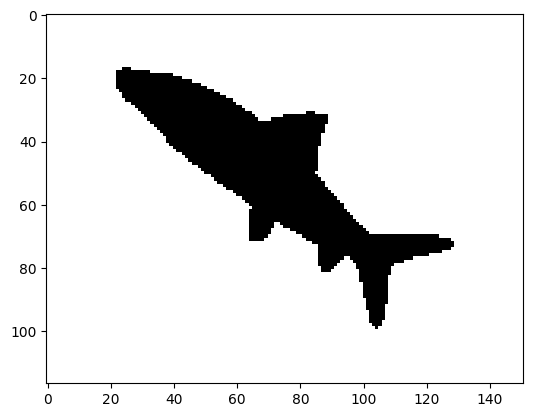

In [29]:
plt.imshow(input_image_padded, cmap='gray')

# Approach

I use morphological image processing for this task. I found the angles at which all the images where rotated and then, just displayed them at an angle = image's angle - template angle. For finding the angle, i make a strainght line on all the angles from 0 to 360 on the image. Now, i check the distance of this line from the image. The line with minimum distance is my axis.